<a href="https://colab.research.google.com/github/Ninja7328/Encryptix/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [4]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [6]:
# Check for missing values
df.isnull().sum()

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to high number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Verify if there are any remaining missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Exploratory Data Analysis (EDA)**

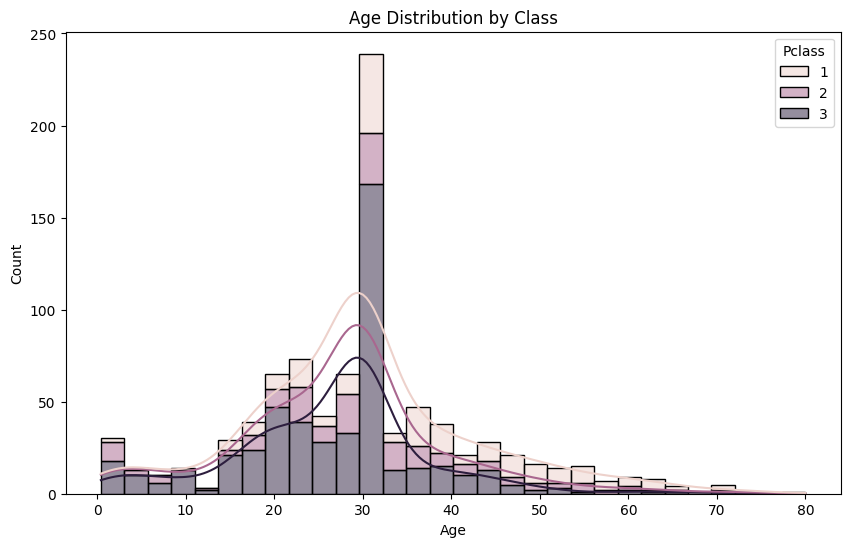

In [11]:
# Age distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', kde=True)
plt.title('Age Distribution by Class')
plt.show()


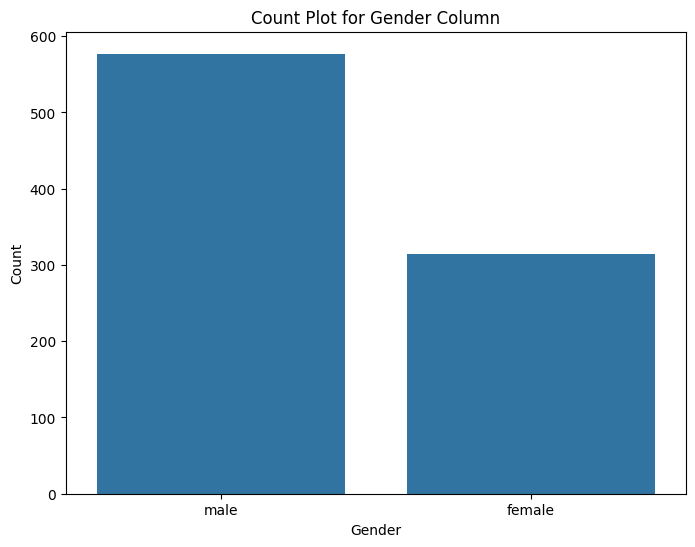

In [12]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Count Plot for Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

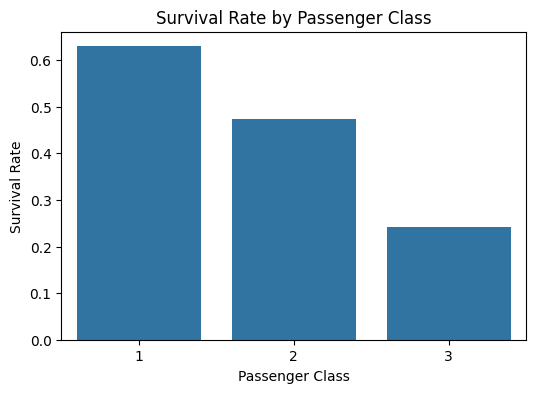

In [13]:
# Survival rate by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

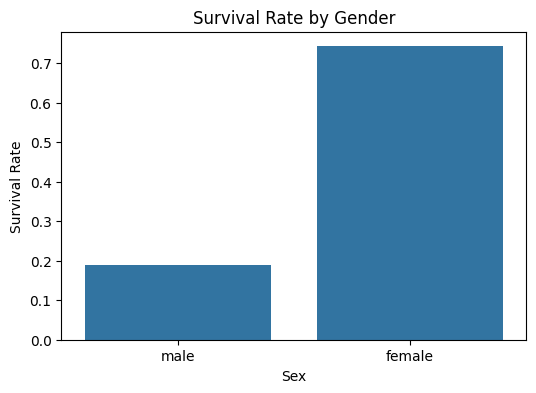

In [14]:
# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

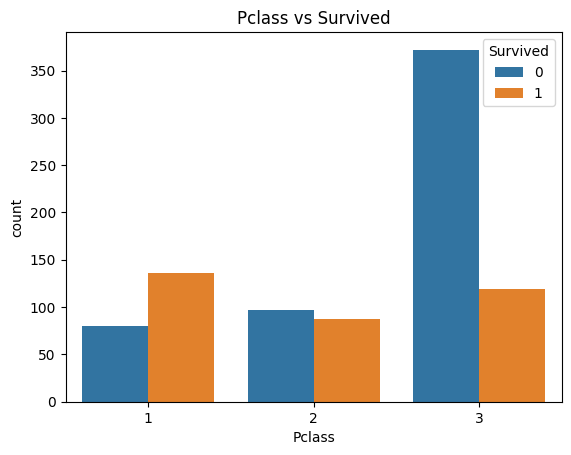

In [15]:
# Pclass vs Survived
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Pclass vs Survived')
plt.show()

**Data Preparation for Modeling**

In [16]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Define features and target variable
X = df[['Pclass', 'Age', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (668, 7)
Test set shape: (223, 7)


**Model Training and Evaluation**

Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       139
           1       0.68      0.67      0.67        84

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223

Accuracy: 0.757847533632287


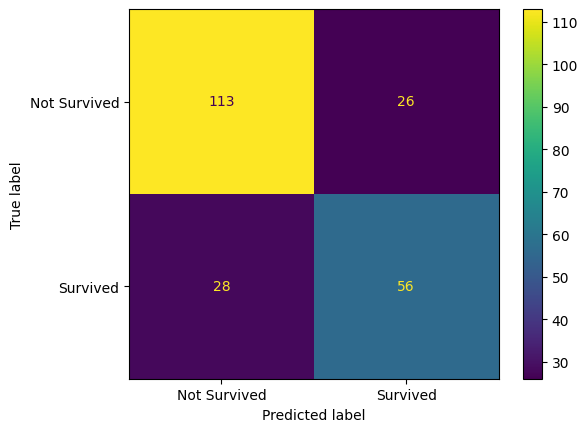

In [19]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Model Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# Confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['Not Survived', 'Survived'])


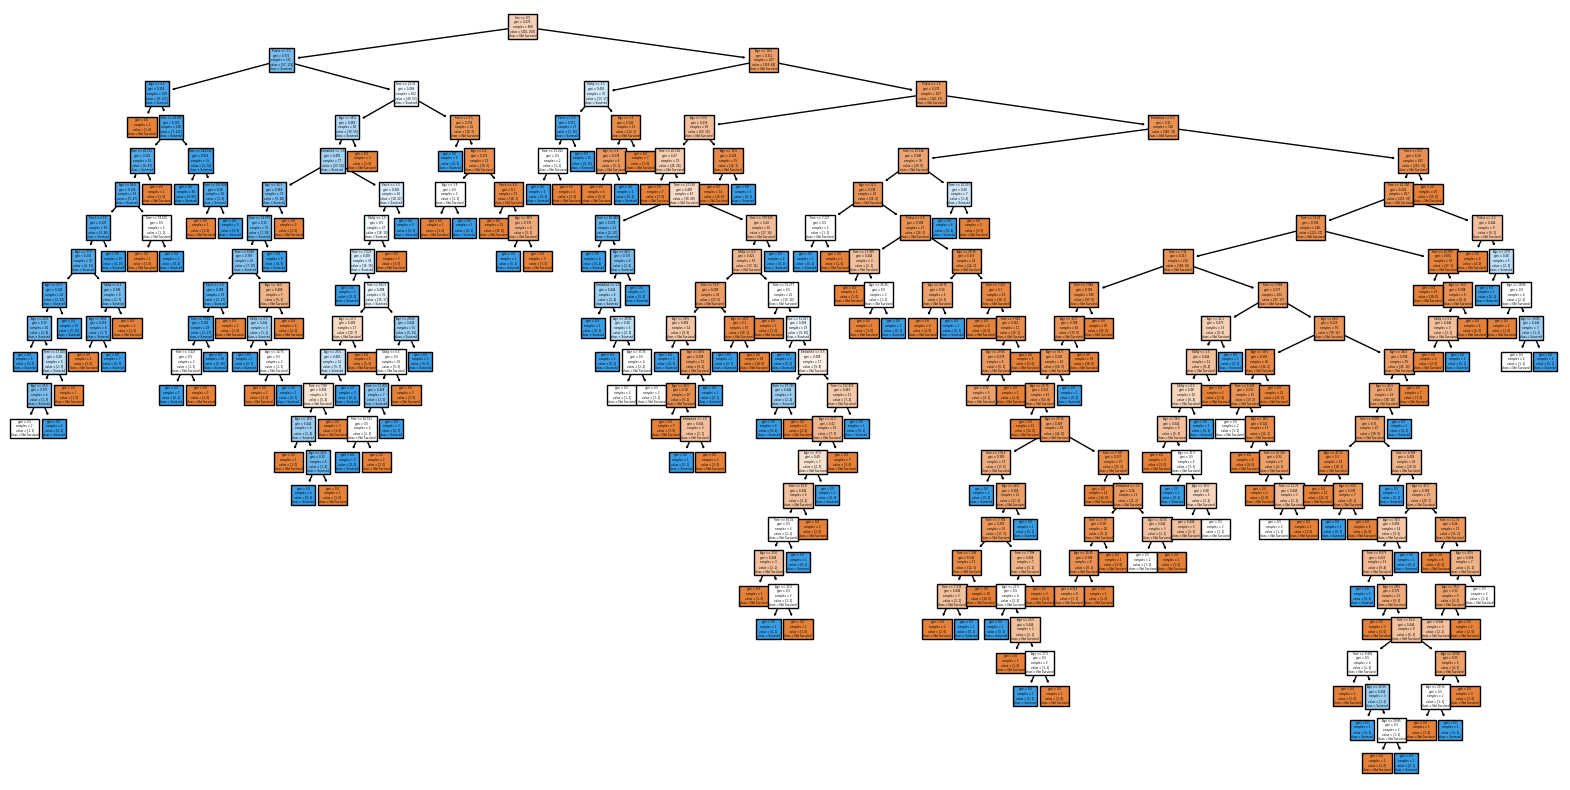

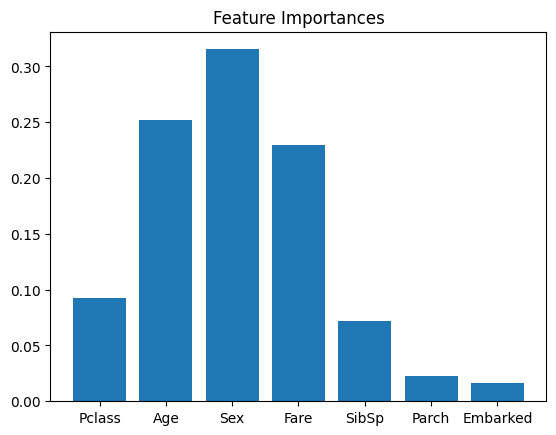

In [18]:
# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Feature importances
plt.bar(X.columns, dt_model.feature_importances_)
plt.title('Feature Importances')
plt.show()

In [22]:
# Initialize other models
rf_model = RandomForestClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       139
           1       0.82      0.74      0.78        84

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223

Accuracy: 0.8385650224215246


In [21]:
# Train and evaluate Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Model Performance:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")

Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       139
           1       0.83      0.75      0.79        84

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223

Accuracy: 0.8475336322869955
